In [1]:
# Import torch
import torch 

# Create random tensor
X = torch.rand(size=(7, 7))
print(X, X.shape)

tensor([[0.0594, 0.1130, 0.9184, 0.0496, 0.3146, 0.6489, 0.7399],
        [0.9455, 0.9718, 0.0430, 0.5521, 0.5085, 0.5262, 0.2696],
        [0.5658, 0.3842, 0.1766, 0.1193, 0.0270, 0.2451, 0.2373],
        [0.6093, 0.8420, 0.2262, 0.7993, 0.5966, 0.7654, 0.5020],
        [0.1318, 0.1083, 0.6117, 0.9822, 0.9974, 0.4869, 0.9420],
        [0.8516, 0.5039, 0.5033, 0.0699, 0.3998, 0.0978, 0.3141],
        [0.7247, 0.6023, 0.3729, 0.1461, 0.8870, 0.5021, 0.2871]]) torch.Size([7, 7])


In [2]:
# Create another random tensor
Y = torch.rand(size=(1, 7))
# Z = torch.matmul(X, Y) # will error because of shape issues
Z = torch.matmul(X, Y.T) # no error because of transpose
print(Z, Z.shape)

tensor([[1.1620],
        [1.9913],
        [0.7827],
        [2.2729],
        [2.5090],
        [1.2929],
        [1.8834]]) torch.Size([7, 1])


In [3]:
# Set manual seed
torch.manual_seed(0)

# Create two random tensors
X = torch.rand(size=(7, 7))
Y = torch.rand(size=(1, 7))

# Matrix multiply tensors
Z = torch.matmul(X, Y.T)
print(Z, Z.shape)

tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]]) torch.Size([7, 1])


In [4]:
# Set random seed
torch.manual_seed(1234)

# Check for access to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# Create two random tensors on GPU
tensor_A = torch.rand(size=(2,3)).to(device)
tensor_B = torch.rand(size=(2,3)).to(device)
print(tensor_A, tensor_B)

Device: cpu
tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]]) tensor([[0.0518, 0.4681, 0.6738],
        [0.3315, 0.7837, 0.5631]])


In [5]:
# Perform matmul on tensor_A and tensor_B
# tensor_C = torch.matmul(tensor_A, tensor_B) # won't work because of shape error
tensor_C = torch.matmul(tensor_A, tensor_B.T)
print(tensor_C, tensor_C.shape)

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]]) torch.Size([2, 2])


In [6]:
# Find max
max = torch.max(tensor_C)

# Find min
min = torch.min(tensor_C)
print(max, min)

tensor(0.5617) tensor(0.3647)


In [7]:
# Find arg max
arg_max = torch.argmax(tensor_C)

# Find arg min
arg_min = torch.argmin(tensor_C)
print(arg_max, arg_min)

tensor(3) tensor(0)


In [8]:
# Set seed
torch.manual_seed(7)

# Create random tensor
tensor_D = torch.rand(size=(1, 1, 1, 10))

# Remove single dimensions
tensor_E = tensor_D.squeeze()

# Print out tensors
print(tensor_D, tensor_D.shape)
print(tensor_E, tensor_E.shape)

tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])


In [9]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
#install matplotlib if you have not!

In [10]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [11]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
stop = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, stop, step)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [12]:
# Split the data into training and testing
train_split = int(0.8 * len(X)) # 80% for training split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

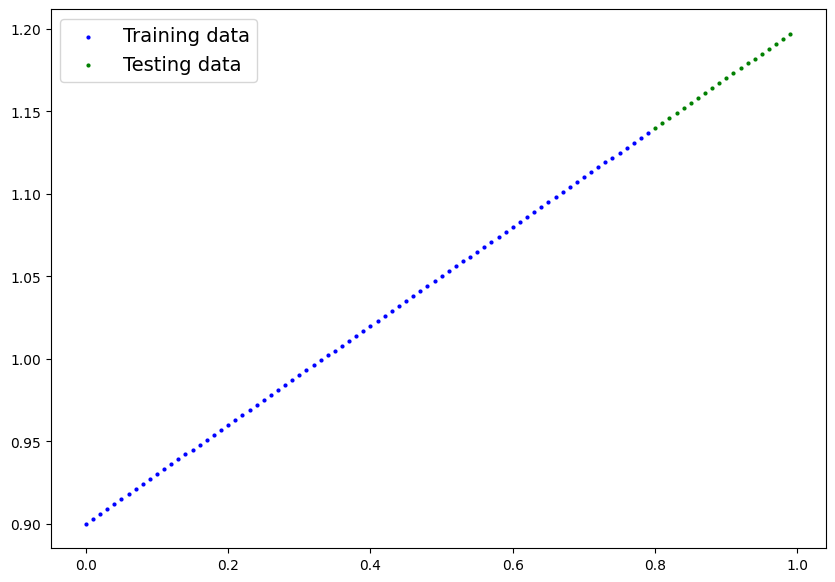

In [13]:
# Plot the training and testing data 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

In [14]:
## Option 1
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(
        data=torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        )
    )
    
    self.bias = nn.Parameter(
        data=torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        )
    )

  def forward(self, x):
    return self.weight * x + self.bias

## Option 2 (same as above instead using nn.Linear())
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear_layer = nn.Linear(in_features=1, 
#                                   out_features=1)
  
#   def forward(self, x):
#     return self.linear_layer(x)

In [15]:
# Instantiate the model
model = LinearRegressionModel().to(device)
print(model)

LinearRegressionModel()


In [16]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [17]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Model in train mode
  model.train()

  # 1. Forward pass
  y_preds = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test)
      # 2. Calculate loss
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.549 | Test loss: 1.463
Epoch: 20 | Train loss: 1.318 | Test loss: 1.192
Epoch: 40 | Train loss: 1.087 | Test loss: 0.921
Epoch: 60 | Train loss: 0.856 | Test loss: 0.651
Epoch: 80 | Train loss: 0.624 | Test loss: 0.380
Epoch: 100 | Train loss: 0.393 | Test loss: 0.109
Epoch: 120 | Train loss: 0.184 | Test loss: 0.142
Epoch: 140 | Train loss: 0.135 | Test loss: 0.238
Epoch: 160 | Train loss: 0.123 | Test loss: 0.263
Epoch: 180 | Train loss: 0.115 | Test loss: 0.261
Epoch: 200 | Train loss: 0.109 | Test loss: 0.250
Epoch: 220 | Train loss: 0.102 | Test loss: 0.235
Epoch: 240 | Train loss: 0.095 | Test loss: 0.219
Epoch: 260 | Train loss: 0.088 | Test loss: 0.204
Epoch: 280 | Train loss: 0.081 | Test loss: 0.189


In [18]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds[:10]

tensor([1.2792, 1.2859, 1.2926, 1.2993, 1.3060, 1.3127, 1.3194, 1.3261, 1.3328,
        1.3394])

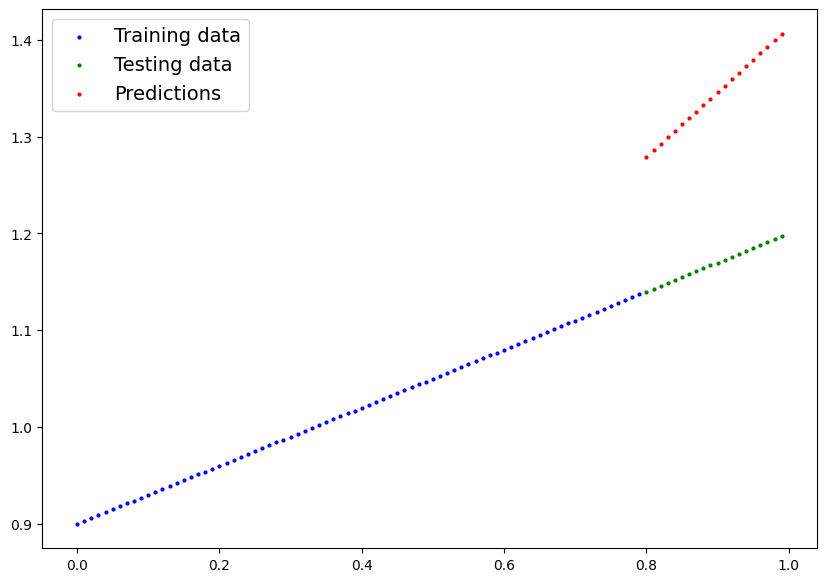

In [19]:
# Plot the predictions
plot_predictions(predictions=y_preds.cpu());

In [20]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_exercises_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_exercises_model.pth


In [21]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [22]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
  loaded_preds = loaded_model(X_test)
y_preds == loaded_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

In [23]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Setup random seed
RANDOM_SEED = 42

cpu


In [24]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

print(X[:10], y[:10])

[[-0.03341062  0.4213911 ]
 [ 0.99882703 -0.4428903 ]
 [ 0.88959204 -0.32784256]
 [ 0.34195829 -0.41768975]
 [-0.83853099  0.53237483]
 [ 0.59906425 -0.28977331]
 [ 0.29009023 -0.2046885 ]
 [-0.03826868  0.45942924]
 [ 1.61377123 -0.2939697 ]
 [ 0.693337    0.82781911]] [1 1 1 1 0 1 1 1 1 0]


In [25]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "y": y})
print(data_df.head())

         X0        X1  y
0 -0.033411  0.421391  1
1  0.998827 -0.442890  1
2  0.889592 -0.327843  1
3  0.341958 -0.417690  1
4 -0.838531  0.532375  0


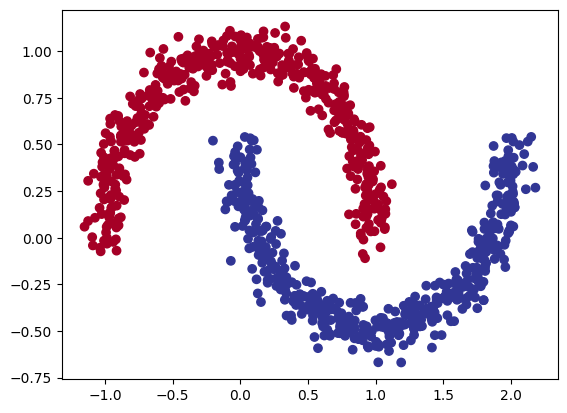

In [26]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [27]:
# Turn data into tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=RANDOM_SEED)

print(len(X_train), len(X_test), len(y_train), len(y_test))

800 200 800 200


In [28]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=in_features, 
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, 
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
print(model_0)
print(model_0.state_dict())

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
OrderedDict([('layer1.weight', tensor([[-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691]])), ('layer1.bias', tensor([-0.5582, -0.3260, -0.1997, -0.4252,  0.0667, -0.6984,  0.6386, -0.6007,
         0.5459,  0.1177])), ('layer2.weight', tensor([[-0.1027,  0.1954,  0.0493,  0.2555,  0.0346, -0.0997,  0.0850, -0.0858,
          0.1331,  0.2823],
        [ 0.1828, -0.1382,  0.1825,  0.0566,  0.1606, -0.1927, -0.3130, -0.1222,
         -0.2426,  0.2595],
        [ 0.0911,  0.1310,  0.1000, -0.0055,  0.2475, -0.2247,  0.0199, -0.2158,
          0.0975, -0.1089

In [29]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid layer built-in
# loss_fn = nn.BCELoss() # requires sigmoid layer

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of model to optimize 
                            lr=0.1) # learning rate

In [30]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.2494, 0.2442, 0.2266, 0.2289, 0.2826, 0.2253, 0.2819, 0.2776, 0.2214,
        0.2641], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5620, 0.5607, 0.5564, 0.5570, 0.5702, 0.5561, 0.5700, 0.5690, 0.5551,
        0.5656], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [35]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy().to(device) # send accuracy function to device
print(acc_fn)

Accuracy()


In [36]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_0.eval() 
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int()) 

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.02 Acc: 1.00 | Test loss: 0.02 Test acc: 1.00
Epoch: 100 | Loss: 0.02 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 200 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 300 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 400 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 500 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 600 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 700 | Loss: 0.01 Acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.01 Acc: 1.00 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.01 Acc: 1.00 | Test loss: 0.00 Test acc: 1.00


In [37]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

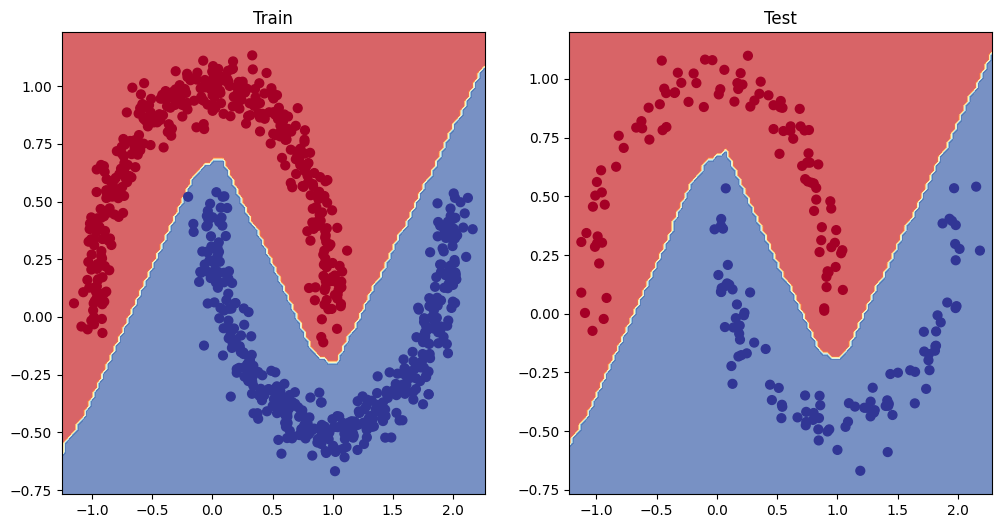

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)